<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-proditorIF/blob/main/Sep8-9/Clase_09sep_McL_BRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Se importan las librerias necesarias
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor #Método de gradiente decendiente
from sklearn.preprocessing import StandardScaler #Normaliza los datos
from sklearn.model_selection import train_test_split #Permite separar eñ conjunto de datos en uno de entrenamiento y uno de validación
import pandas as pd
from IPython.display import Image
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1 Se analiza la base datos
La base de datos es de 205 autos

In [ ]:
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Machine_Learn/CarPrice_Assignment.csv"
from pandas.core.api import DataFrame
#Se leen los datos
datac=pd.read_csv("/content/drive/MyDrive/Machine_Learn/CarPrice_Assignment.csv")
#Se deslpiegan los datos
datac.head()

Mounted at /content/drive


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#Variables categoricas
#Primeramente se realiza una lipieza de los datos
marca=datac['CarName'].apply(lambda x : x.split(' ')[0])
datac.insert(3,"marca",marca)
datac.drop(['CarName'],axis=1,inplace=True)
#Ya se tiene solo la marca
print(datac['marca'])

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: marca, Length: 205, dtype: object


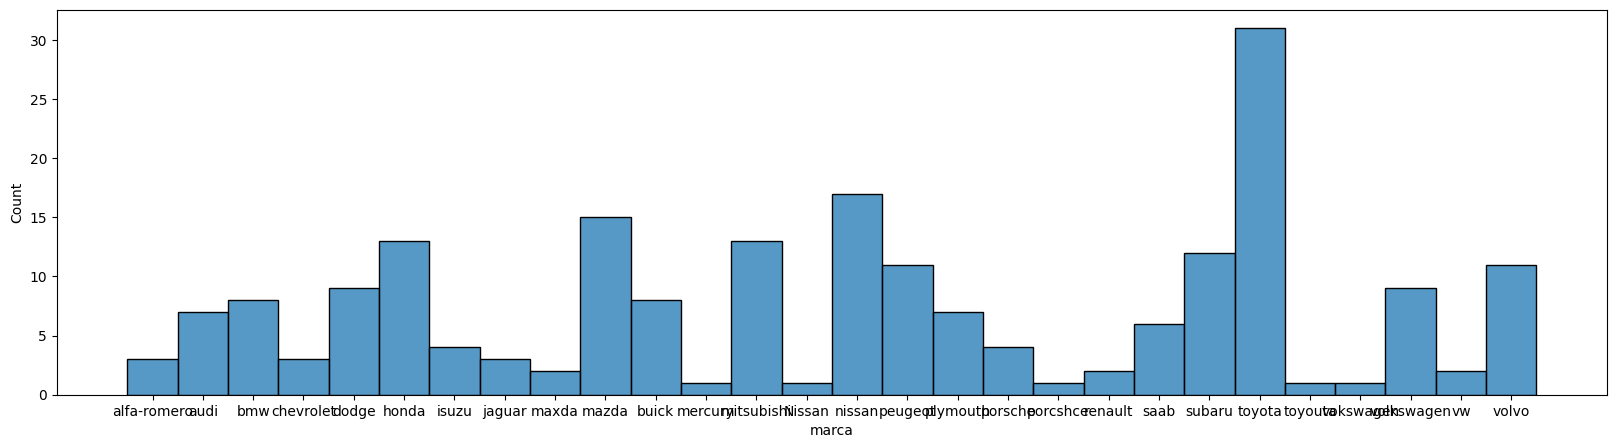

In [ ]:
datac['marca'].astype('category').value_counts()
plt.figure(figsize=(20,5))
sns.histplot(datac['marca'])
plt.show()
#Se aprecian errores en algunas marcas

In [ ]:
#Se Verifican si hay errores
print(datac["marca"].unique())
#Se corrigen los datos
datac["marca"] = datac["marca"].str.lower()
datac["marca"].replace("maxda","mazda",inplace=True)
datac["marca"].replace("porcshce","porsche",inplace=True)
datac["marca"].replace("vw","volkswagen",inplace=True)
datac["marca"].replace("toyouta","toyota",inplace=True)
datac["marca"].replace("vokswagen","volkswagen",inplace=True)
print("Datos Corregidos")
print(datac["marca"].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
Datos Corregidos
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


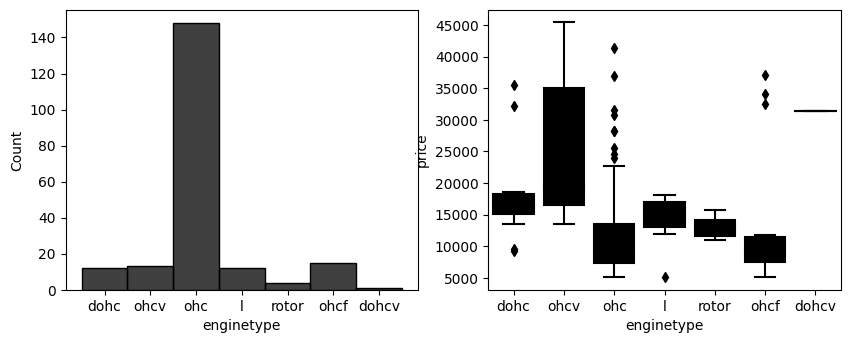

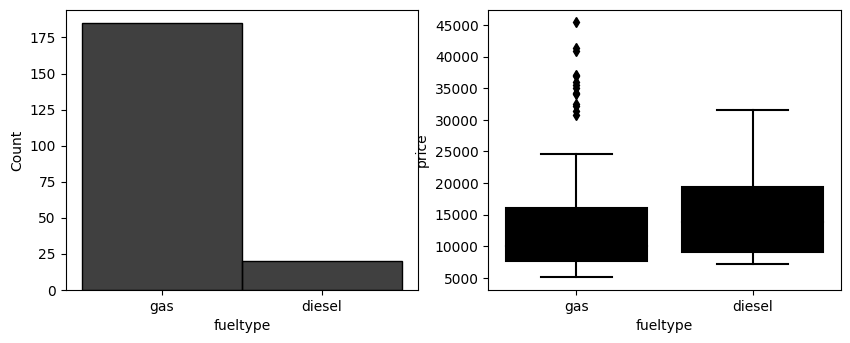

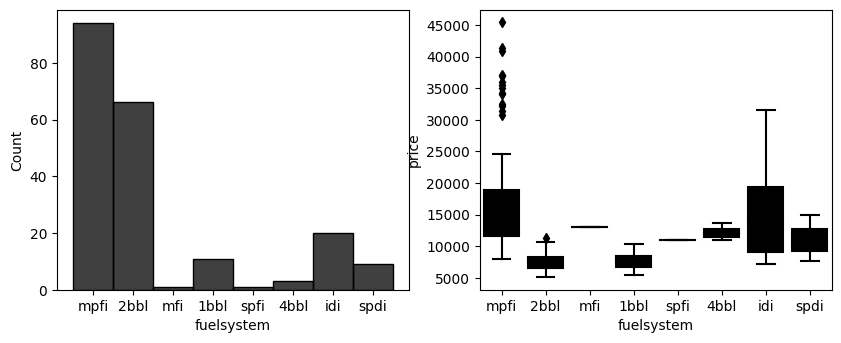

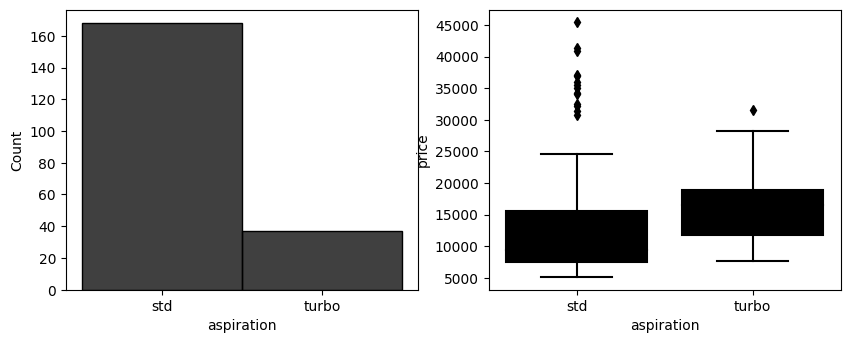

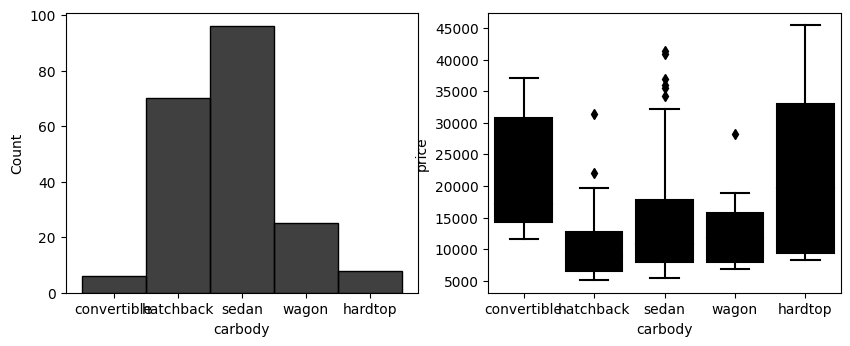

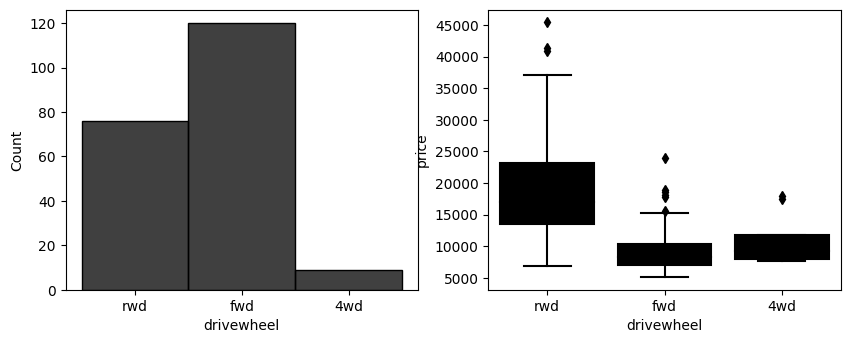

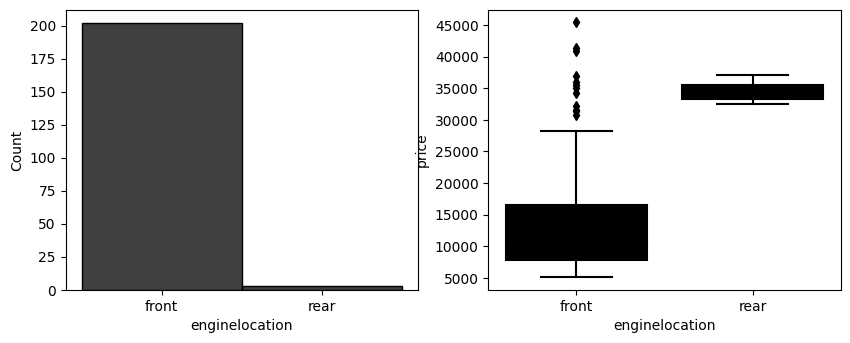

In [ ]:

#Gráficos para las variables categóricas
costc = datac['price']
vcat = np.array([datac['enginetype'],datac['fueltype'],datac['fuelsystem'],datac['aspiration'],datac['carbody'],datac['drivewheel'],datac['enginelocation'],datac['marca']])
labcat = ['enginetype','fueltype','fuelsystem',	'aspiration',	'carbody'	,'drivewheel','enginelocation','marca']
#Imprimimos los datos en fromato de histograma y en formato box
for i in range(len(vcat)-1):
  plt.figure(figsize=(10, 8))
  plt.subplot(2, 2, 1)
  sns.histplot(data=datac, x=vcat[i],color='black')
  plt.xlabel(labcat[i])
  plt.subplot(2, 2, 2)
  sns.boxplot(data=datac,x=labcat[i], y='price',color='black')
  plt.xlabel(labcat[i])
  plt.show()


<Figure size 2000x500 with 0 Axes>

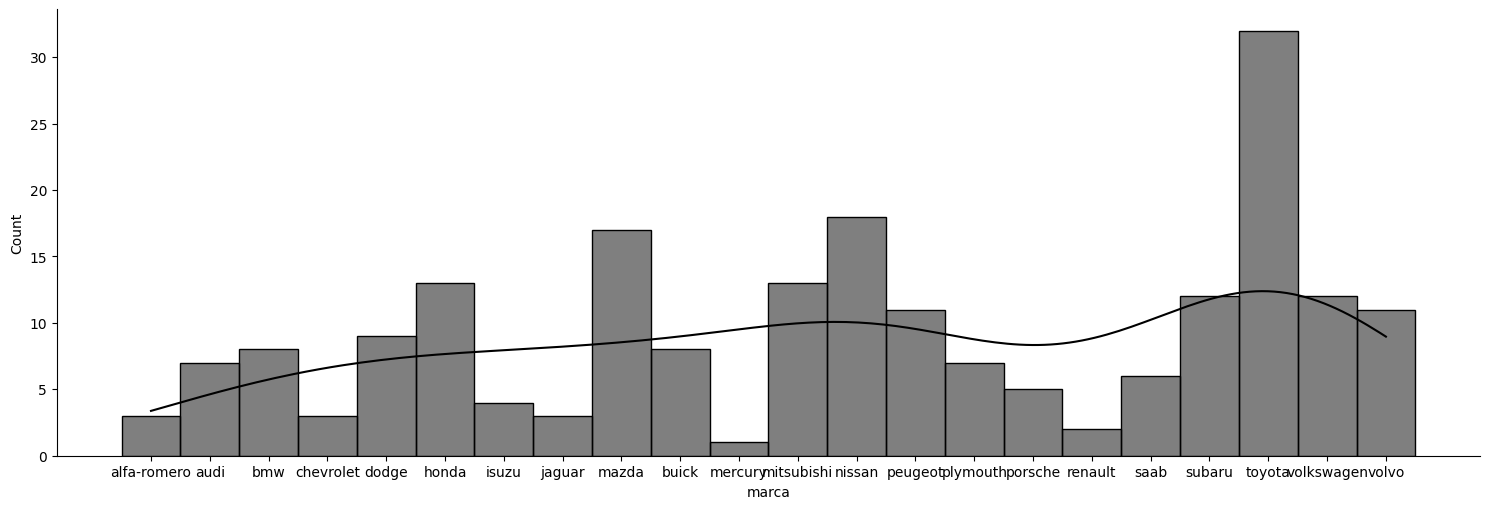

In [ ]:
#Se analiza por separado la marca
plt.figure(figsize=(20,5))
sns.displot(data=vcat[7],kde=True,aspect=3,color='black')
plt.xlabel(labcat[7])
plt.show()

Text(0.5, 0, 'cylindernumber')

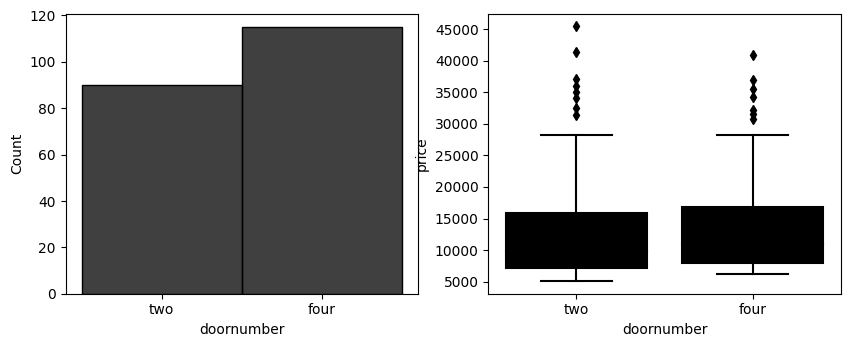

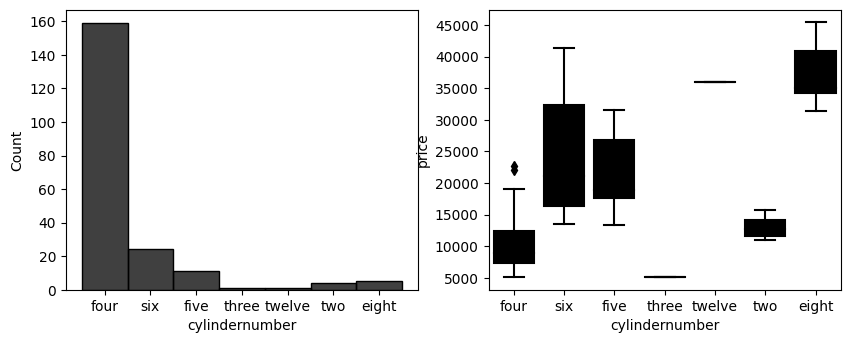

In [ ]:
#Las variables CylinderNumber,doornumber podrian ser númericas ya que sus datos son números
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=datac, x=datac['doornumber'],color='black')
plt.xlabel('doornumber')
plt.subplot(2, 2, 2)
sns.boxplot(data=datac,x='doornumber', y=costc,color='black')
plt.xlabel('doornumber')
#Para el número de cilindros
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=datac, x=datac['cylindernumber'],color='black')
plt.xlabel('cylindernumber')
plt.subplot(2, 2, 2)
sns.boxplot(data=datac,x='cylindernumber', y=costc,color='black')
plt.xlabel('cylindernumber')

Coeficiente de correlación entre el costo  Wheelbase: 57.78%
Coeficiente de correlación entre el costo  Symboling: -8.00%
Coeficiente de correlación entre el costo  Carlength: 68.29%
Coeficiente de correlación entre el costo  Carwidth: 75.93%


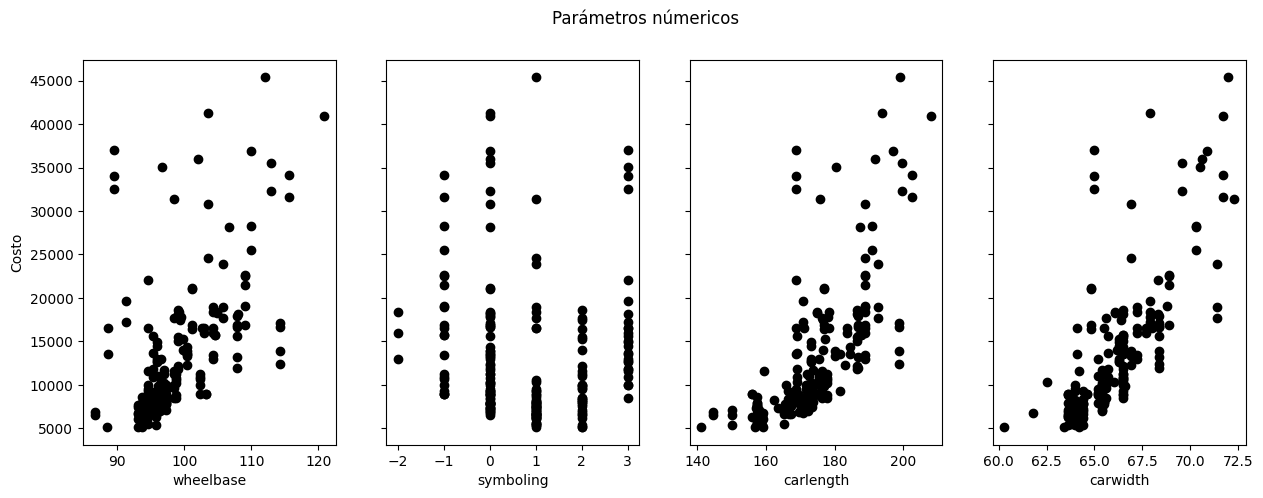

Coeficiente de correlación entre el costo  Carheight: 11.93%
Coeficiente de correlación entre el costo  Curbweight: 83.53%
Coeficiente de correlación entre el costo  Enginesize: 87.41%
Coeficiente de correlación entre el costo  Boreratio: 55.32%


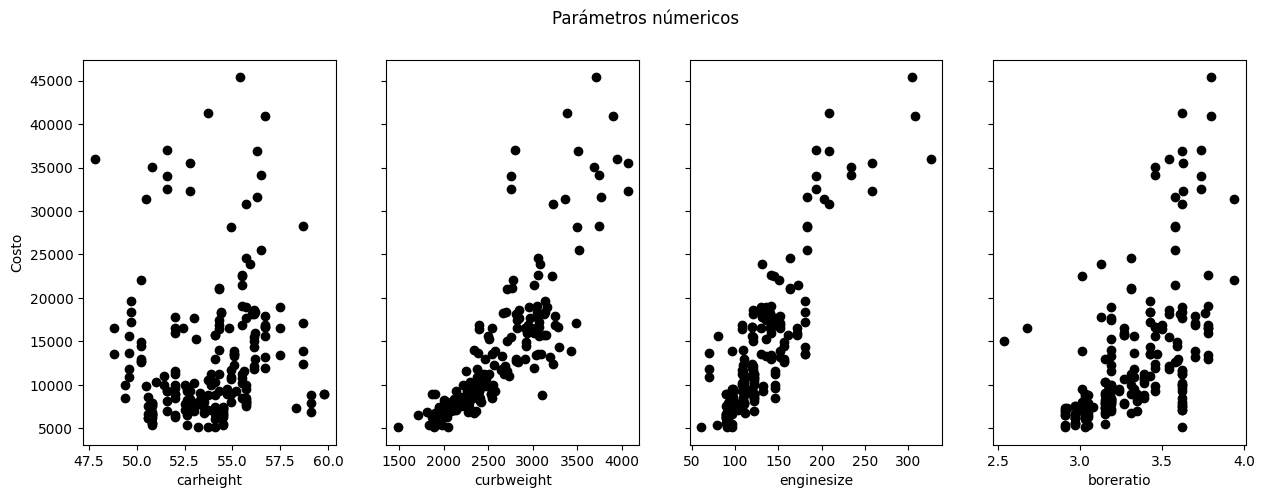

Coeficiente de correlación entre el costo  Stroke: 7.94%
Coeficiente de correlación entre el costo  Compressionratio: 6.80%
Coeficiente de correlación entre el costo  Horsepower: 80.81%
Coeficiente de correlación entre el costo  Peakrpm: -8.53%


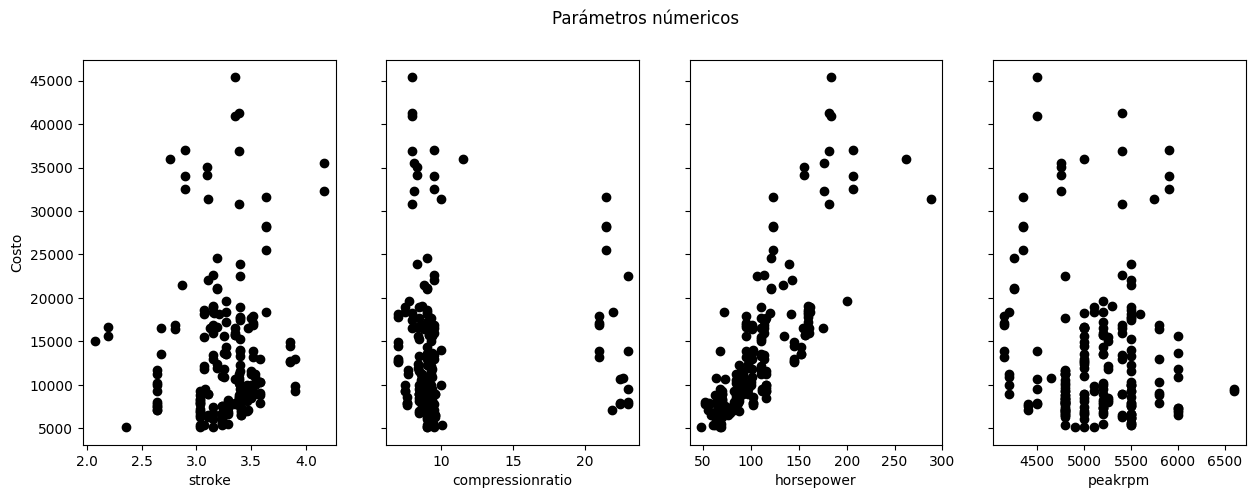

Coeficiente de correlación entre el costo  Horsepower: 80.81%
Coeficiente de correlación entre el costo  Peakrpm: -8.53%


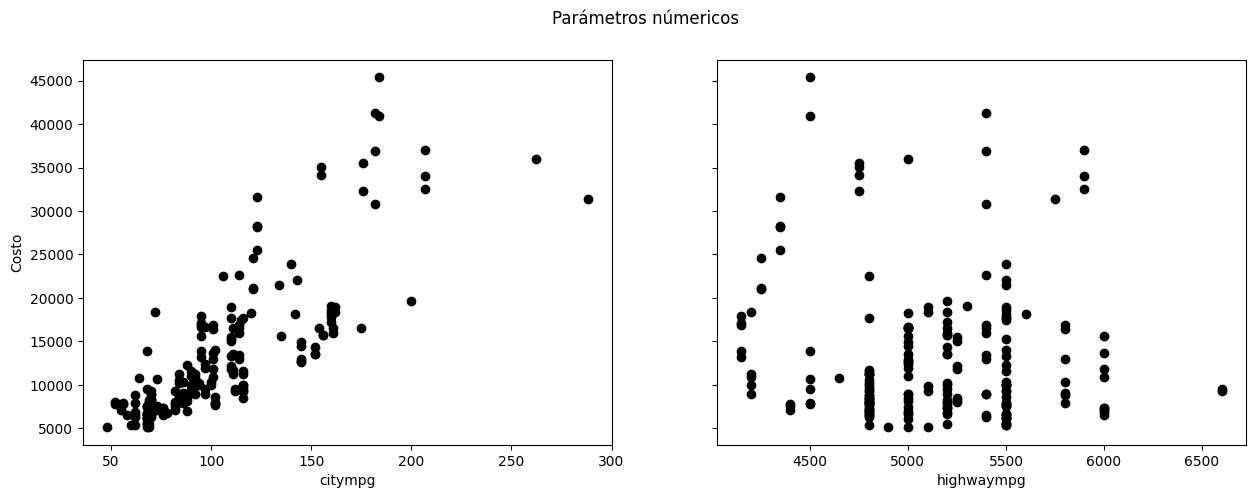

In [ ]:
#Variables númericas
#Se establece un arreglo con las variables númericas
vnum =np.array([datac['wheelbase'],datac['symboling'],datac['carlength'],datac['carwidth'],datac['carheight'],datac['curbweight'],datac['enginesize'],
                datac['boreratio'],datac['stroke'],datac['compressionratio'],datac['horsepower'],datac['peakrpm'],datac['citympg'],datac['highwaympg']])
#Tambien se crea un directorio
labels =['wheelbase','symboling','carlength',	'carwidth', 'carheight','curbweight','enginesize','boreratio',
         'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
#Se grafican los datos en contraste con el precio además se muestra el coeficiente correlación entre cada parámetro y el costo
fig,ax=plt.subplots(1,4,figsize=(15, 5),sharey=True)
fig.suptitle("Parámetros númericos")
for i in range(4):
    print(f"Coeficiente de correlación entre el costo  {labels[i].title()}: {datac[labels[i]].corr(datac['price']):.2%}")
    ax[i].scatter(vnum[i,:],costc,color="black")
    ax[i].set_xlabel(labels[i])
ax[0].set_ylabel("Costo");
plt.show()
fig,ax=plt.subplots(1,4,figsize=(15, 5),sharey=True)
fig.suptitle("Parámetros númericos")
for i in range(4):
    print(f"Coeficiente de correlación entre el costo  {labels[i+4].title()}: {datac[labels[i+4]].corr(datac['price']):.2%}")
    ax[i].scatter(vnum[i+4,:],costc,color="black")
    ax[i].set_xlabel(labels[i+4])
ax[0].set_ylabel("Costo");
plt.show()
#
fig,ax=plt.subplots(1,4,figsize=(15, 5),sharey=True)
fig.suptitle("Parámetros númericos")
for i in range(4):
    print(f"Coeficiente de correlación entre el costo  {labels[i+8].title()}: {datac[labels[i+8]].corr(datac['price']):.2%}")
    ax[i].scatter(vnum[i+8,:],costc,color="black")
    ax[i].set_xlabel(labels[i+8])
ax[0].set_ylabel("Costo");
plt.show()
#
fig,ax=plt.subplots(1,2,figsize=(15, 5),sharey=True)
fig.suptitle("Parámetros númericos")
for i in range(2):
    print(f"Coeficiente de correlación entre el costo  {labels[i+10].title()}: {datac[labels[i+10]].corr(datac['price']):.2%}")
    ax[i].scatter(vnum[i+10,:],costc,color="black")
    ax[i].set_xlabel(labels[i+12])
ax[0].set_ylabel("Costo");
plt.show()


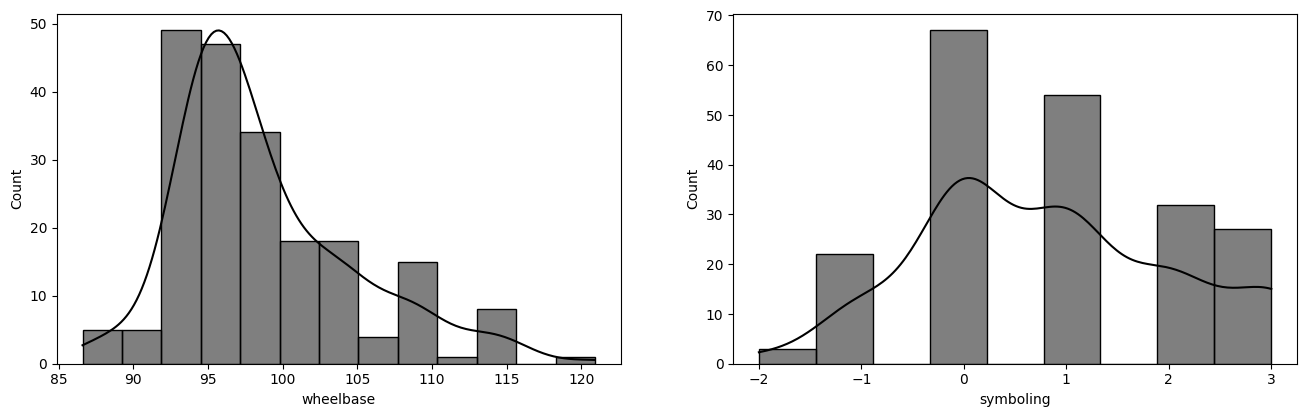

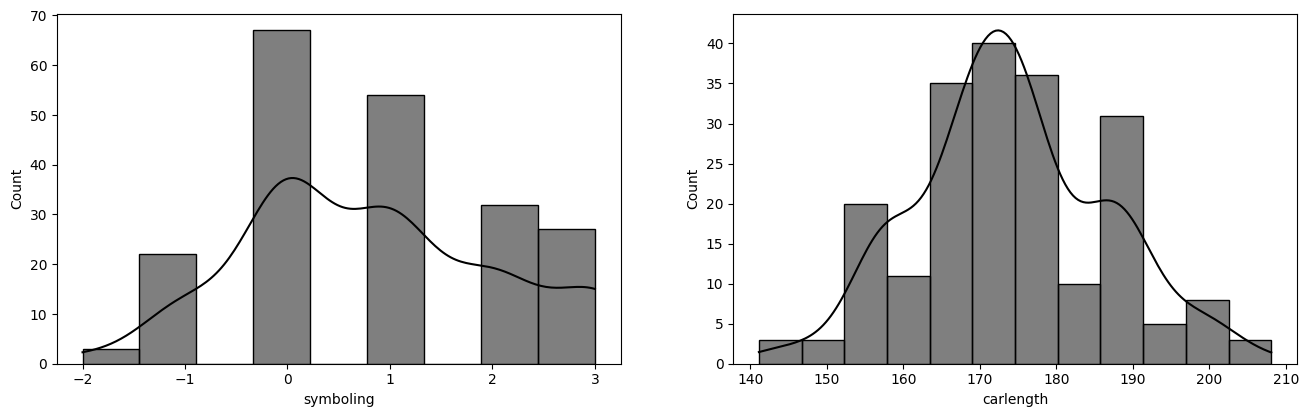

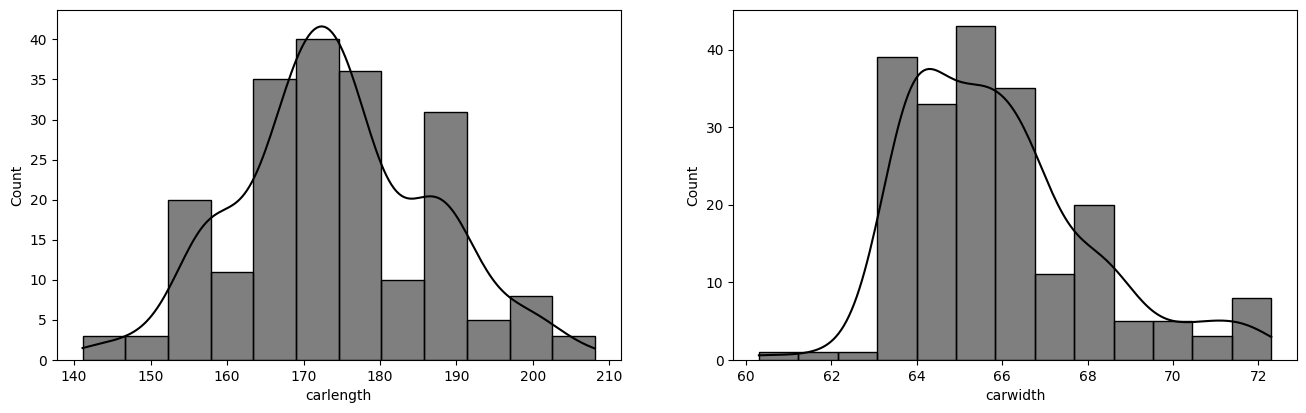

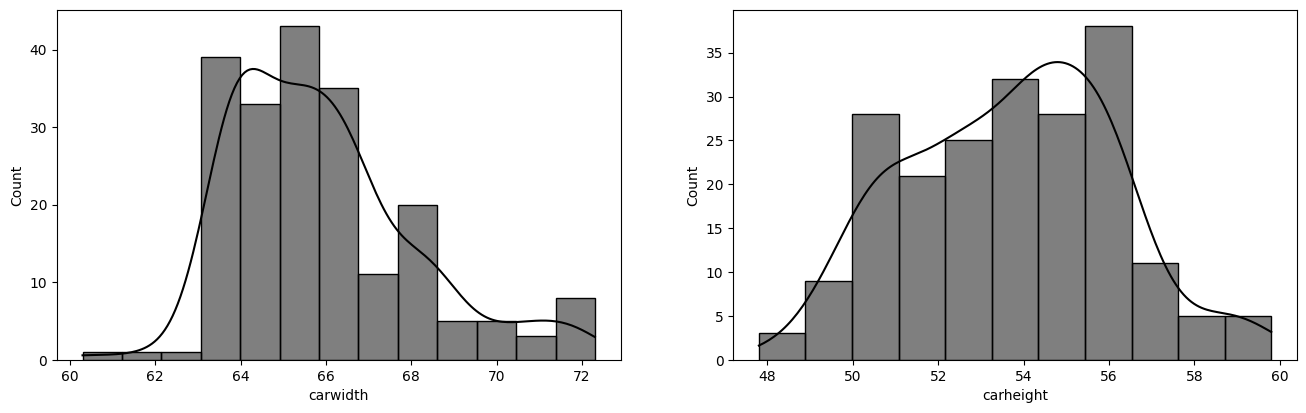

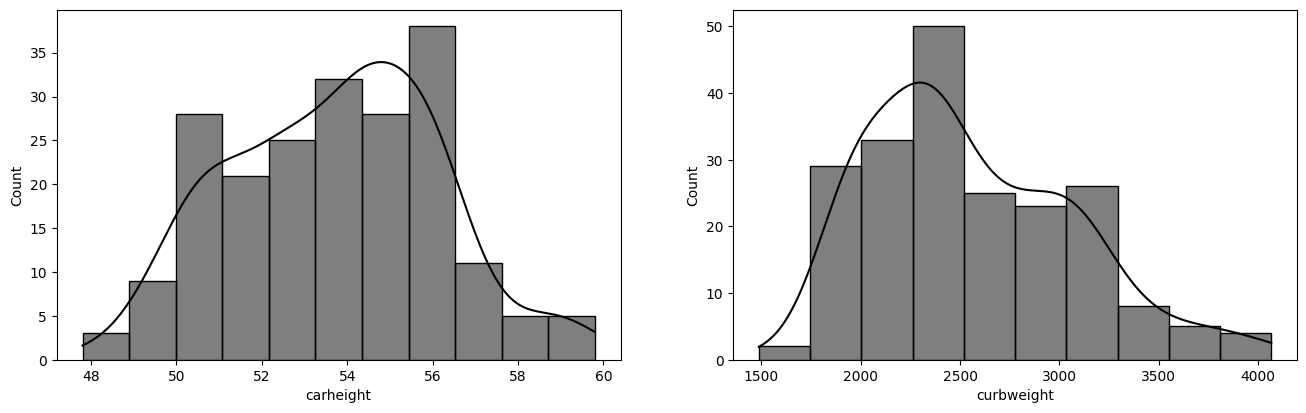

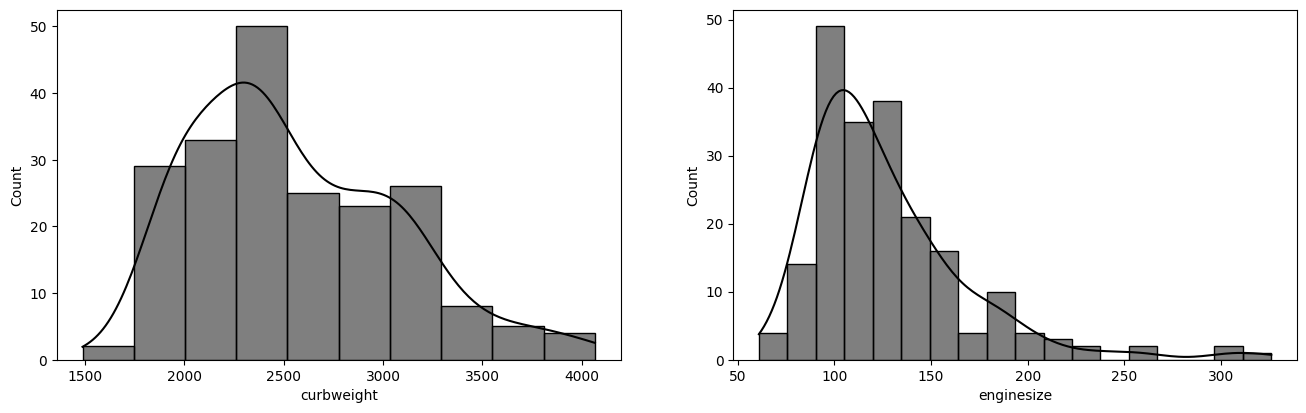

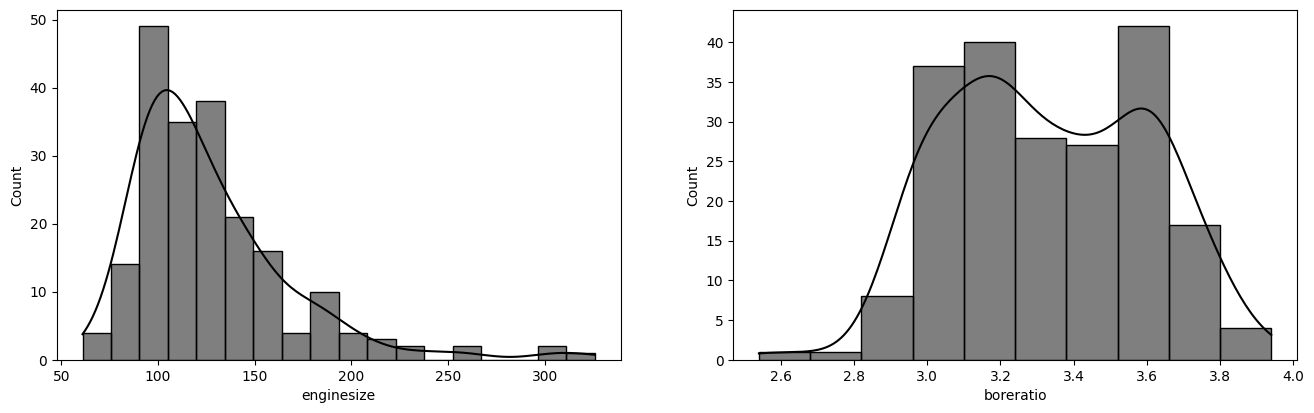

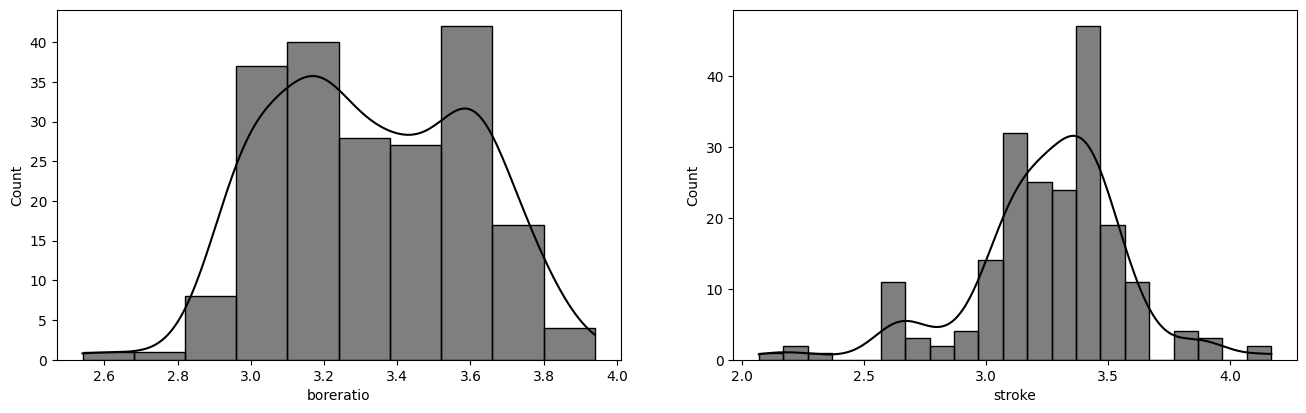

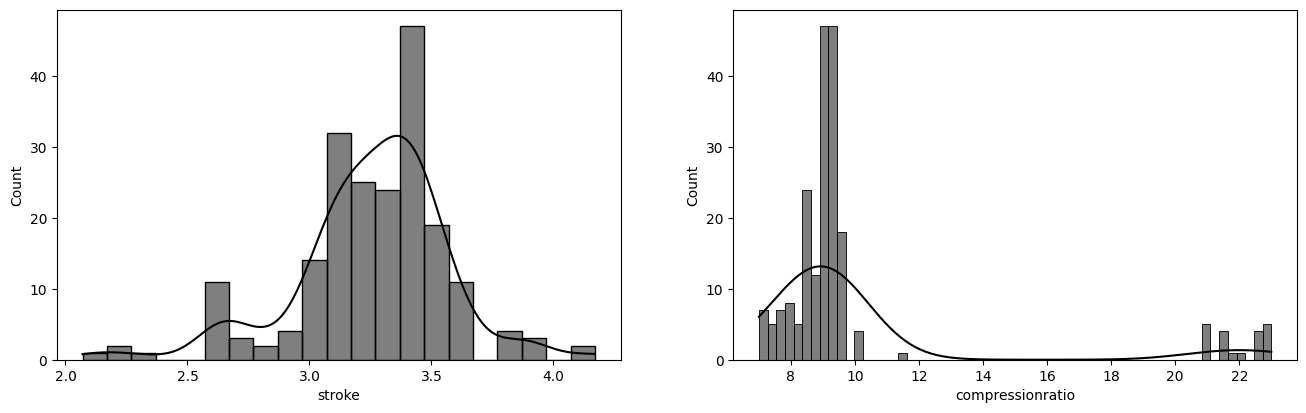

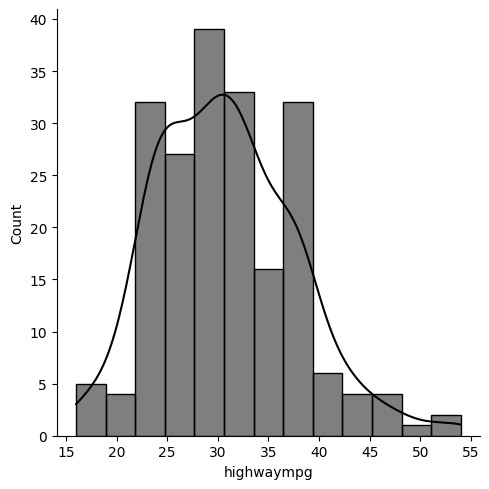

In [ ]:
#Histogramas de densidad
for i in range(9):
  plt.figure(figsize=(16, 10))
  plt.subplot(2, 2, 1)
  sns.histplot(data=datac, x=labels[i], kde=True,color='black')
  plt.xlabel(labels[i])
  plt.subplot(2, 2, 2)
  sns.histplot(data=datac, x=labels[i+1], kde=True,color='black')
  plt.xlabel(labels[i+1])
sns.displot(data=datac['highwaympg'], kde=True,aspect=1,color='black')
plt.xlabel('highwaympg')
plt.show()

### Tratamiento de variables categóricas
El tratamiento de las variables categóricas es importante ya que es necesario tener una representación cuantitativa de la información que contienen esto se puede lograr convirtiéndolas en variables “Dummy” también conocidas como variables ficticias las cuales emplean la representación binaria para indicar la presencia de una categoría en específico.

In [ ]:
#Variables categoricas
#Se separan las varaibles categóricas
catcol =datac.select_dtypes('object').columns
print("Variables categóricas",catcol)
#Se copia la base de datos original
datac_1=datac
#Se cambia a variables fiticias la base copia
datac_1=pd.get_dummies(datac_1,columns=catcol,drop_first=True)
# Se verfica que no haya datatype object
datac_1.info()

Variables categóricas Index(['marca', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   enginesize             205 non-null    int64  
 8   boreratio              205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compressionratio       205 non-null    float64
 11  horsepower

### Correlación
El coeficiente de correlación lineal, es una medida de regresión que tiene por objetivo cuantificar el grado de variación conjunta entre dos variables diferentes.
Conocer el coficiente de correlación entre las variables y el precio seria de utilidad para definir un primer modelo.

In [ ]:
col= datac.columns
print("Coficientes de correlación variables númericas")
for i in range(14):
    print(f"Coeficiente de correlación entre el costo  {labels[i].title()}: {datac[labels[i]].corr(datac['price']):.2%}")

Coficientes de correlación variables númericas
Coeficiente de correlación entre el costo  Wheelbase: 57.78%
Coeficiente de correlación entre el costo  Symboling: -8.00%
Coeficiente de correlación entre el costo  Carlength: 68.29%
Coeficiente de correlación entre el costo  Carwidth: 75.93%
Coeficiente de correlación entre el costo  Carheight: 11.93%
Coeficiente de correlación entre el costo  Curbweight: 83.53%
Coeficiente de correlación entre el costo  Enginesize: 87.41%
Coeficiente de correlación entre el costo  Boreratio: 55.32%
Coeficiente de correlación entre el costo  Stroke: 7.94%
Coeficiente de correlación entre el costo  Compressionratio: 6.80%
Coeficiente de correlación entre el costo  Horsepower: 80.81%
Coeficiente de correlación entre el costo  Peakrpm: -8.53%
Coeficiente de correlación entre el costo  Citympg: -68.58%
Coeficiente de correlación entre el costo  Highwaympg: -69.76%


<Axes: >

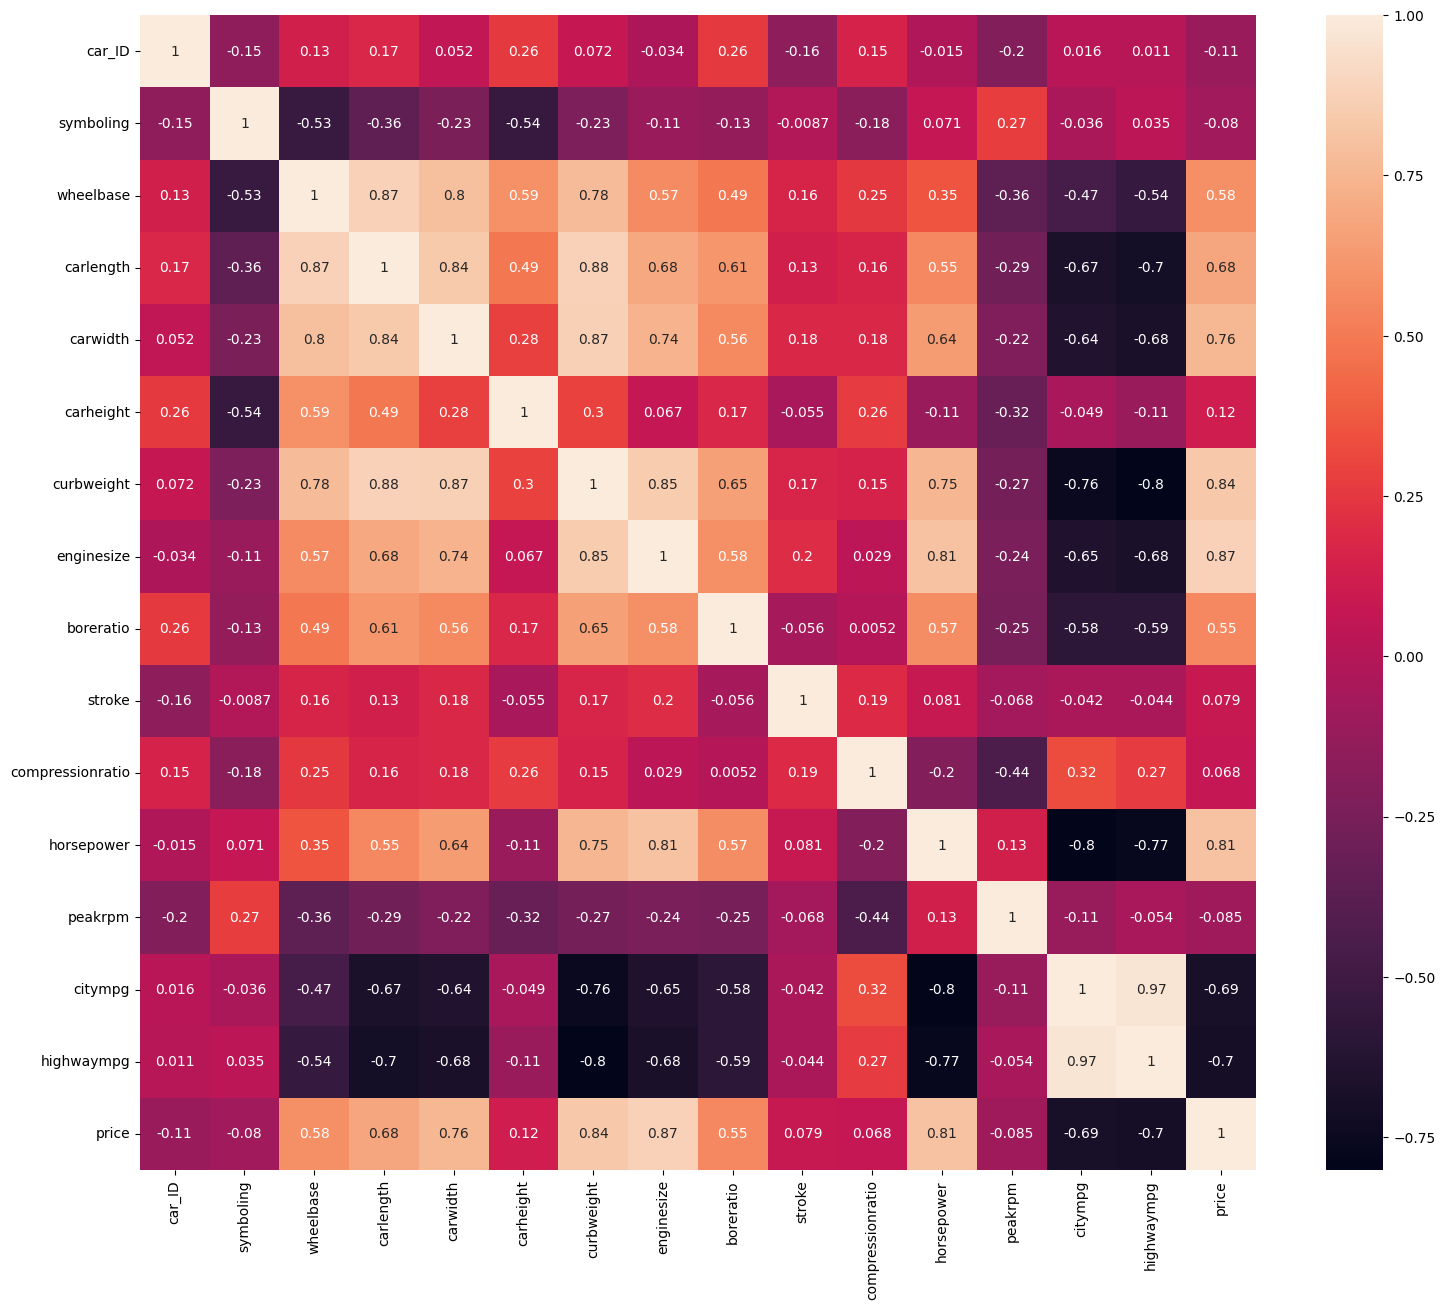

In [ ]:
#Mapa de calor general
fig,ax=plt.subplots(1,1,figsize=(18,15))
sns.heatmap(datac.corr(),annot=True)


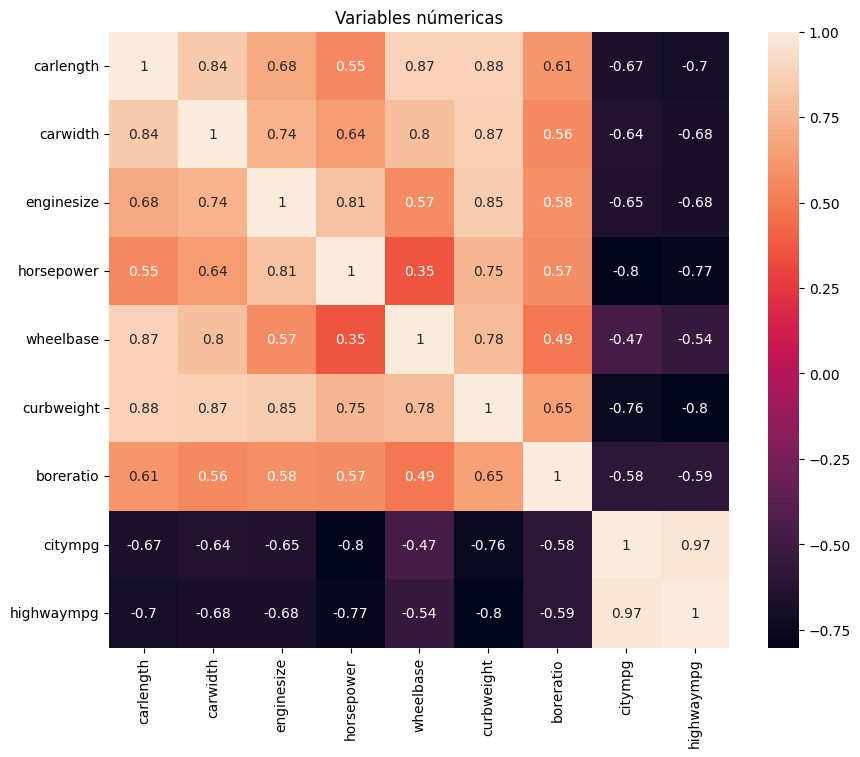

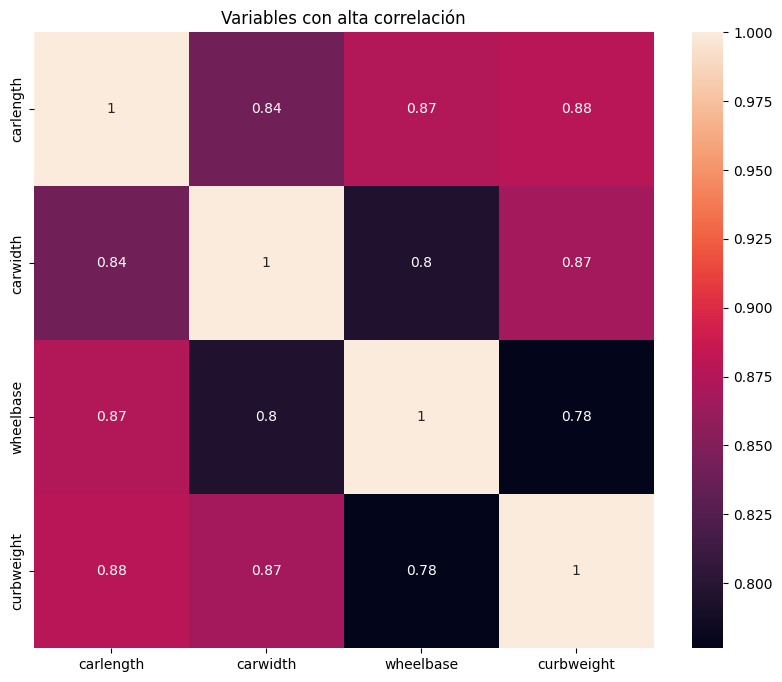

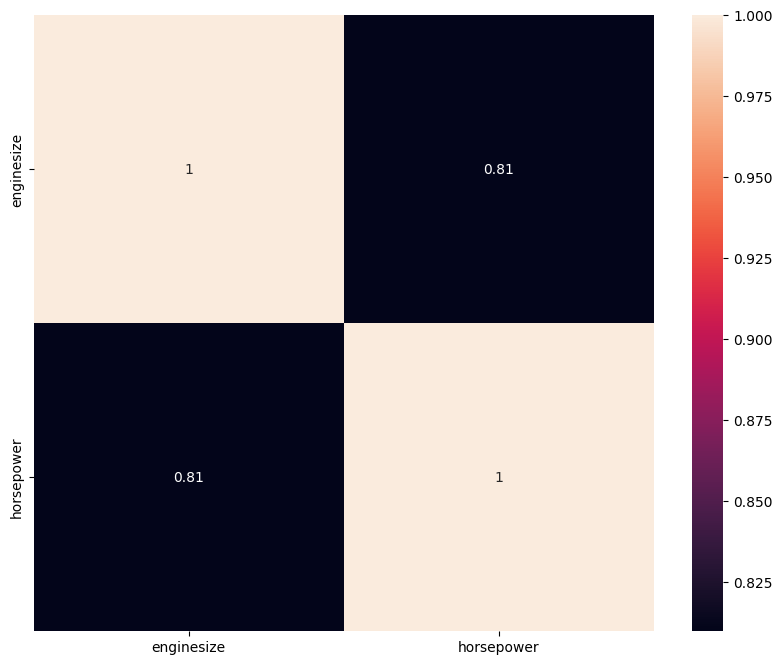

In [ ]:
#Mapa de calor con las variables númericas
mcor =['carlength', 'carwidth', 'enginesize', 'horsepower', 'wheelbase', 'curbweight', 'boreratio', 'citympg', 'highwaympg']
fig,ax=plt.subplots(1,1,figsize=(10,8))
plt.title("Variables númericas")
sns.heatmap(data=datac.filter(mcor).corr(), annot=True)
#En base a las corrleaciones altas mostradas se estudia mas a fondo la correlación entre ciertas variables
plt.show()
vwcor =['carlength', 'carwidth', 'wheelbase', 'curbweight']
fig,ax=plt.subplots(1,1,figsize=(10,8))
plt.title("Variables con alta correlación")
sns.heatmap(data=datac.filter(vwcor).corr(), annot=True)
plt.show()
# Se verifcan las correlaciones entre ciertas variables para no considerar mas variables de las necesarias
fig,ax=plt.subplots(1,1,figsize=(10,8))
vwcor =['enginesize','horsepower',]
sns.heatmap(data=datac.filter(vwcor).corr(), annot=True)
plt.show()

### Modelos


#### Modelo 1
Primeramente se plantea un modelo que emplea solo variables numéricas tomando las de mayor correlación pero filtrando las que guardan correlación entre ellas.
Las varaiables selccionadas son:


*   Horse Power
*   Carlength
*   Boreratio
*   Stroke
*   Curbweigth



In [ ]:
#Se crea la matriz X y el vector Y
#Se elimian las varaiables categóricas
X1 = datac.drop(catcol,axis='columns')
elvar_1 = ['car_ID','symboling','wheelbase','carwidth','carheight','enginesize','compressionratio','peakrpm','citympg','highwaympg','price']
X1 = X1.drop(elvar_1,axis='columns')
Y = datac['price']
X1.head()

,carlength,curbweight,boreratio,stroke,horsepower
0,168.8,2548,3.47,2.68,111
1,168.8,2548,3.47,2.68,111
2,171.2,2823,2.68,3.47,154
3,176.6,2337,3.19,3.40,102
4,176.6,2824,3.19,3.40,115


In [ ]:
from sklearn.linear_model import SGDRegressor #Método de gradiente decendiente
from sklearn.preprocessing import StandardScaler #Normaliza los datos
from sklearn.model_selection import train_test_split #Permite separar eñ conjunto de datos en uno de entrenamiento y uno de validación
# Se normalizan los datos
X1N = StandardScaler().fit_transform(X1)
#Ahora se emplea la función train_test_split para dividir el conjunto de datos en un grupo de entrenamiento y un grupo de validación
X1tr, X1ts, Y1tr, Y1ts = train_test_split(X1N, Y, test_size=0.80, random_state=25)
#test_size determina el tamaño del conjunto de validación siendo el 25% del conjunto total
Grad1= SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.009,penalty=None)
#loss establece el tipo de función error y squared_error hace refrencia al error cuadrático
#penalty establece que no se penaliza por sobre-ajuste
Grad1.fit(X1N, Y)
print(f"Número de iteraciones: {Grad1.n_iter_}, numero de actualizaciones de peso W: {Grad1.t_}")
# Se extraen los parámetros
w01 = Grad1.intercept_
w1 = Grad1.coef_
print("Score del modelo 1:",Grad1.score(X1N,Y))

Número de iteraciones: 13, numero de actualizaciones de peso W: 2666.0
Score del modelo 1: 0.7705843653868274


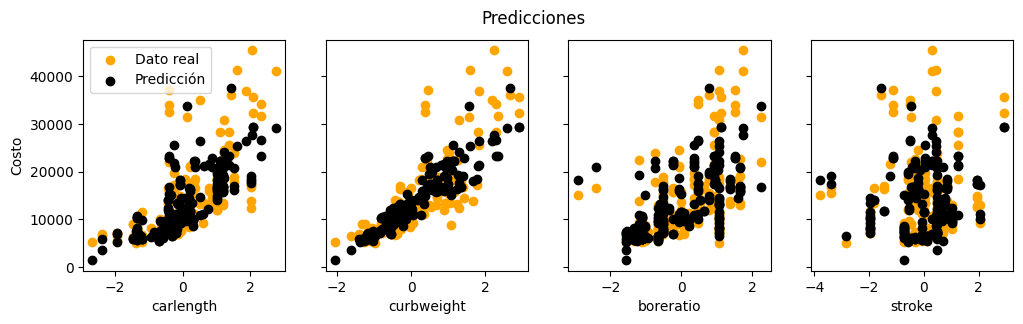

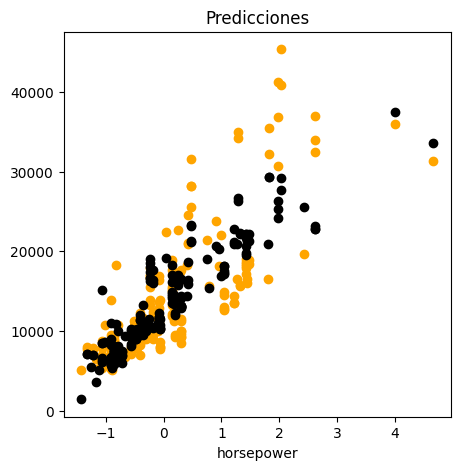

In [ ]:
yp = w01[0]

xp =np.array(X1)
for i in range(len(w1)):
  yp+=w1[i]*X1N[:,i]
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X1N[:,i],Y,color="orange", label = 'Dato real')
    ax[i].scatter(X1N[:,i],yp,color="black", label = 'Predicción')
    ax[i].set_xlabel(X1.columns[i])

ax[0].set_ylabel("Costo"); ax[0].legend();
fig.suptitle("Predicciones")
plt.figure(figsize=(5,5))
plt.title("Predicciones")
plt.xlabel(X1.columns[4])
plt.scatter(X1N[:,4],Y,color="orange", label = 'Dato real')
plt.scatter(X1N[:,4],yp,color="black", label = 'Predicción')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
# Se establece una semilla
np.random.seed(2)
mod1 = Sequential()
mod1.add(Dense(1, input_dim= 5, activation='linear'))
#Se establece el valor de a
sgd = SGD(learning_rate=0.2)
# Se compila el modelo y se establece el tipo de función error y el tipo de optimización  a SGD
mod1.compile(loss='mse', optimizer=sgd)
n = 205
# Se establece el tamaños de los sub grupos
bn =Y1tr.shape[0]
# Se aplica el modelo
history = mod1.fit(X1tr, Y1tr, epochs=n, batch_size=bn)

Epoch 1/205
1/1 [==============================] - 0s 309ms/step - loss: 208020800.0000
Epoch 2/205
1/1 [==============================] - 0s 9ms/step - loss: 69994072.0000
Epoch 3/205
1/1 [==============================] - 0s 6ms/step - loss: 29643408.0000
Epoch 4/205
1/1 [==============================] - 0s 6ms/step - loss: 16203028.0000
Epoch 5/205
1/1 [==============================] - 0s 7ms/step - loss: 11276489.0000
Epoch 6/205
1/1 [==============================] - 0s 5ms/step - loss: 9272759.0000
Epoch 7/205
1/1 [==============================] - 0s 7ms/step - loss: 8332648.5000
Epoch 8/205
1/1 [==============================] - 0s 7ms/step - loss: 7805948.0000
Epoch 9/205
1/1 [==============================] - 0s 5ms/step - loss: 7456317.0000
Epoch 10/205
1/1 [==============================] - 0s 5ms/step - loss: 7193685.0000
Epoch 11/205
1/1 [==============================] - 0s 4ms/step - loss: 6981149.0000
Epoch 12/205
1/1 [==============================] - 0s 5ms/step - 

Pesos 
Wi=[[-1259.8564]
 [ 6478.79  ]
 [ -709.1497]
 [ -139.4042]
 [ 1865.9681]]  

W0=[13013.42]



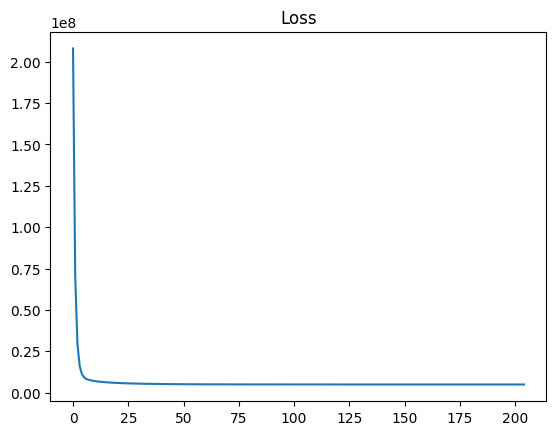

In [ ]:
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt.title('Loss')
history_df['loss'].plot();
capas = mod1.layers[0]
# Se extraen los pesos
w, w0 = capas.get_weights()
print(f"Pesos \nWi={w}  \n\nW0={w0}\n")
W=np.vstack(w)

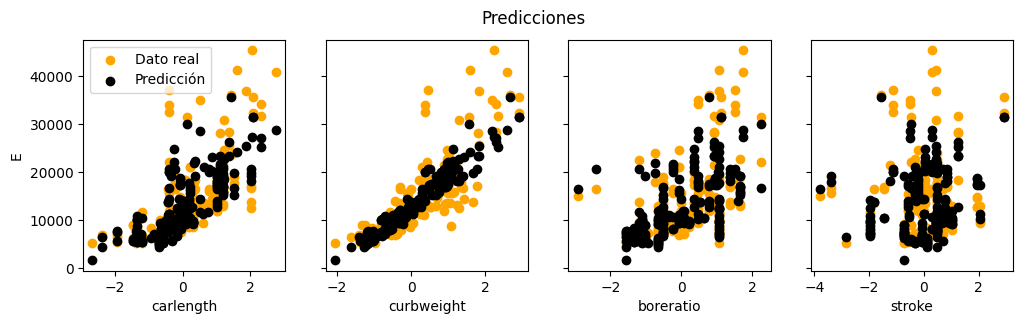

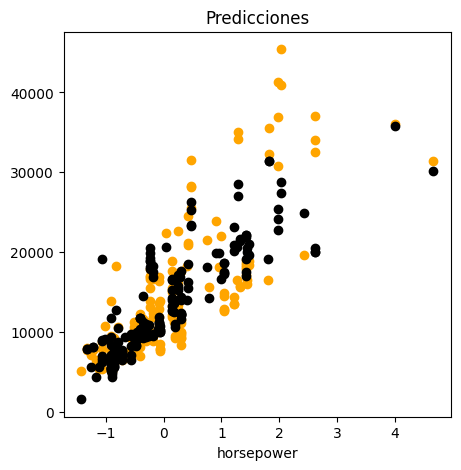

In [ ]:
# Predicciones
Predp1 = w0[0]
for i in range(len(w)):
  Predp1+=W[i]*X1N[:,i]
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X1N[:,i],Y,color="orange", label = 'Dato real')
    ax[i].scatter(X1N[:,i],Predp1,color="black", label = 'Predicción')
    ax[i].set_xlabel(X1.columns[i])
ax[0].set_ylabel("E"); ax[0].legend();
fig.suptitle("Predicciones")
plt.figure(figsize=(5,5))
plt.title("Predicciones")
plt.xlabel(X1.columns[4])
plt.scatter(X1N[:,4],Y,color="orange", label = 'Dato real')
plt.scatter(X1N[:,4],Predp1,color="black", label = 'Predicción')
plt.show()

####  Modelo 2
Se añade una variable con alta correlación pero negativa.

In [ ]:
from re import X
X2 = datac.drop(catcol,axis='columns')
elvar_2 = ['car_ID','symboling','wheelbase','carwidth','carheight','enginesize','compressionratio','peakrpm','highwaympg','price']
X2 = X2.drop(elvar_2,axis='columns')
X2.head()

,carlength,curbweight,boreratio,stroke,horsepower,citympg
0,168.8,2548,3.47,2.68,111,21
1,168.8,2548,3.47,2.68,111,21
2,171.2,2823,2.68,3.47,154,19
3,176.6,2337,3.19,3.40,102,24
4,176.6,2824,3.19,3.40,115,18


Número de iteraciones: 13, numero de actualizaciones de peso W: 2666.0
Score del modelo 2: 0.8716485444720957


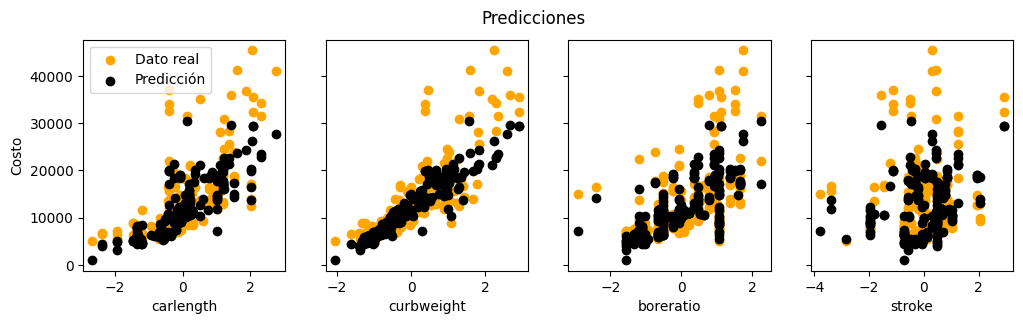

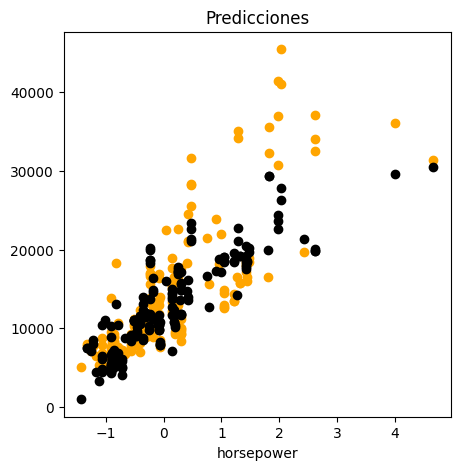

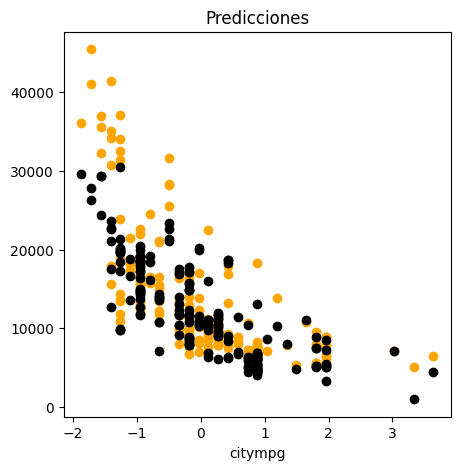

In [ ]:
# Se normalizan los datos
X2N = StandardScaler().fit_transform(X2)
X2tr, X2ts, Y2tr, Y2ts = train_test_split(X2N, Y, test_size=0.80, random_state=25)
#test_size determina el tamaño del conjunto de validación siendo el 25% del conjunto total
Grad2= SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.001,penalty=None)
#loss establece el tipo de función error y squared_error hace refrencia al error cuadrático
#penalty establece que no se penaliza por sobre-ajuste
Grad2.fit(X2tr, Y2tr)
print(f"Número de iteraciones: {Grad1.n_iter_}, numero de actualizaciones de peso W: {Grad1.t_}")
# Se extraen los parámetros
w02 = Grad2.intercept_
w2 = Grad2.coef_
print("Score del modelo 2:",Grad2.score(X2tr,Y2tr))
yp2 = w02[0]
for i in range(len(w2)):
  yp2+=w2[i]*X2N[:,i]
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X2N[:,i],Y,color="orange", label = 'Dato real')
    ax[i].scatter(X2N[:,i],yp2,color="black", label = 'Predicción')
    ax[i].set_xlabel(X2.columns[i])

ax[0].set_ylabel("Costo"); ax[0].legend();
fig.suptitle("Predicciones")
plt.figure(figsize=(5,5))
plt.title("Predicciones")
plt.xlabel(X2.columns[4])
plt.scatter(X2N[:,4],Y,color="orange", label = 'Dato real')
plt.scatter(X2N[:,4],yp2,color="black", label = 'Predicción')
plt.figure(figsize=(5,5))
plt.title("Predicciones")
plt.xlabel(X2.columns[5])
plt.scatter(X2N[:,5],Y,color="orange", label = 'Dato real')
plt.scatter(X2N[:,5],yp2,color="black", label = 'Predicción')
plt.show()

In [ ]:
np.random.seed(2)
mod2 = Sequential()
mod2.add(Dense(1, input_dim= 6, activation='linear'))
#Se establece el valor de a
sgd = SGD(learning_rate=0.2)
# Se compila el modelo y se establece el tipo de función error y el tipo de optimización  a SGD
mod1.compile(loss='mse', optimizer=sgd)
n = 205
# Se establece el tamaños de los sub grupos
bn =Y2tr.shape[0]
# Se aplica el modelo
history = mod1.fit(X2tr, Y2tr, epochs=n, batch_size=bn)

Epoch 1/205


ValueError: ignored